# Seaborn Workshop

Seaborn is a Python data visualization library based on matplotlib. 
It provides a high-level interface for drawing attractive and informative statistical graphics.

___

Installing Seaborn (conda installation recommend)

https://seaborn.pydata.org/installing.html

___

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # seaborn library

For this session, you will need the data set named ```heart.csv```, which can be downloaded from our [GitHub repository](https://github.com/IC-Computational-Biology-Society/Pandas_Matplotlib_session.git) dedicated to today's workshop. Make sure you save it in the same directory as this Jupyter notebook. 

___

## Getting Started

In [134]:
df = pd.read_csv('heart.csv')
display(df.head())

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Dataset description** 

- ```age```: The patient's age
- ```gender```: 0 = female and 1 = male
- ```cp```: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- ```trestbps```: The patient's resting blood pressure (mm Hg on admission to the hospital)
- ```chol```: The patient's cholesterol measurement in mg/dl
- ```fbs```: The patient's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- ```restecg```: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- ```thalach```: The patient's maximum heart rate achieved
- ```exang```: Exercise induced angina (0 = no, 1 = yes)
- ```oldpeak```: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- ```slope```: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ```ca```: The number of major vessels (0-3)
- ```thal```: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- ```target```: Heart disease (0 = no, 1 = yes)

In [143]:
# get the number of patients (number of rows) and columns of the dataset
print ("number of patients :", len(df))
print ("number of columns :", len(df.columns))

number of patients : 303
number of columns : 14


In [136]:
# check if any values are missing
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Task 1

Plot a histogram using  ```sns.histplot``` function of the patients age distribution.
Set the paramete ```kde```  to ```True``` inlcude the kernel density estimate.

Don't forget to include the plot's title.
___

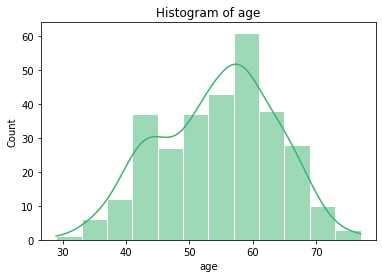

In [110]:
plt.subplots(1, 1, figsize=(6, 4))   

sns.histplot(data=df, 
            x = 'age',
            color = "mediumseagreen",
            kde=True,
            ec = 'w')

plt.title("Histogram of age", fontsize=12)
plt.show()

Create a new histogram using again the ```sns.histplot``` function but showing in different colour the patients with disease (target = 1) and patients without disease (target = 0)
____

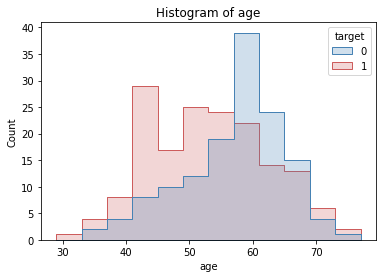

In [111]:
plt.subplots(1, 1, figsize=(6, 4))   

sns.histplot(data=df, 
            x = 'age',
            hue="target", # set hue to 'target' to indicate that this variable will be shown in different colour
            element="step",  # easier for visualisation of overlapping bars
            palette= ["steelblue", "indianred"]) #set a specific colour to each histogram

plt.title("Histogram of age", fontsize=12)
plt.show()

## Task 2 

Similar to histograms are kernel density estimate (KDE) plots, which can be used for visualising the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve.

___

Use the ```sns.kdeplot``` function to visualise to the distribution of resting blood pressure ```trestbps``` with the patients ```gender``` (0 = female, 1 = male)

Rename the legend to 'female' and 'male'
___

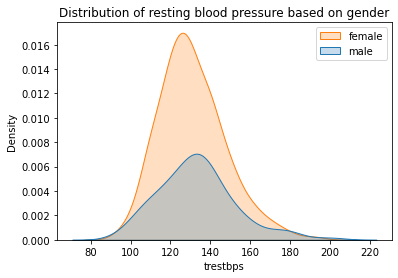

In [137]:
plt.subplots(1, 1, figsize=(6, 4))

sns.kdeplot(data=df, x="trestbps", hue="gender", shade=True)
plt.legend(['female', 'male'])
plt.title ("Distribution of resting blood pressure based on gender")

plt.show()

Create a new figure that contains two subplots, one showing the distribution of resting blood pressure ```trestbps``` with gender and the other showing the distribution of cholesterol ```chol``` with gender.

Include a title to each of the subplots and rename the legends to 'female' and 'male'.
___

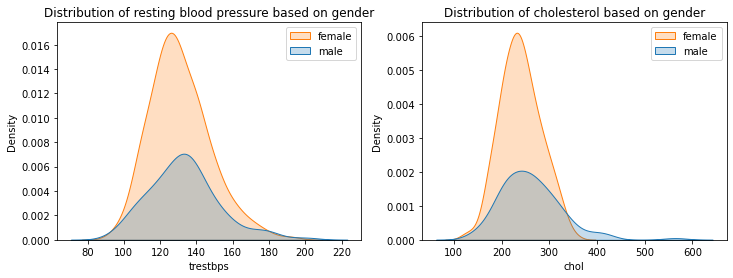

In [138]:
figure, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.kdeplot(data=df, x="trestbps", hue="gender", shade=True, ax=axes[0])
axes[0].set_title("Distribution of resting blood pressure based on gender")
axes[0].legend(['female', 'male'])

sns.kdeplot(data=df, x="chol", hue="gender", shade=True, ax=axes[1])
axes[1].set_title("Distribution of cholesterol based on gender")
axes[1].legend(['female', 'male'])

plt.show() 

## Task 3

Use the ```sns.countplot``` function to visualise the counts of patients with and without the disease based on their gender.

Rename the x ticks labels to 'female' and 'male' and the legend values to 'disease' and 'no disease'.
___

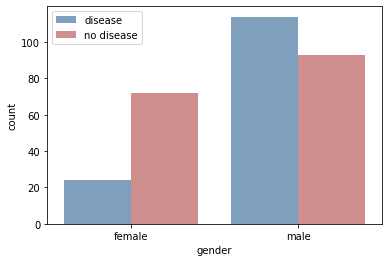

In [142]:
figure, axes = plt.subplots(1, 1, figsize=(6, 4))
             
axes = sns.countplot(data= df,
              x="gender", 
              hue="target",
             palette= ["steelblue", "indianred"],
             alpha=0.75)

axes.set_xticklabels(['female', 'male'])
axes.legend(['no disease', 'disease'])

plt.show()

## Task 4

Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable).

Plot a correlation matrix using the ```sns.heatmap``` showing the correlation of the features to each other and the target value.

**Hint**

The correlation between the variable in the data can be caluated using ``` df.corr()```, which needs to be added as the data parameter of the heatmap function.

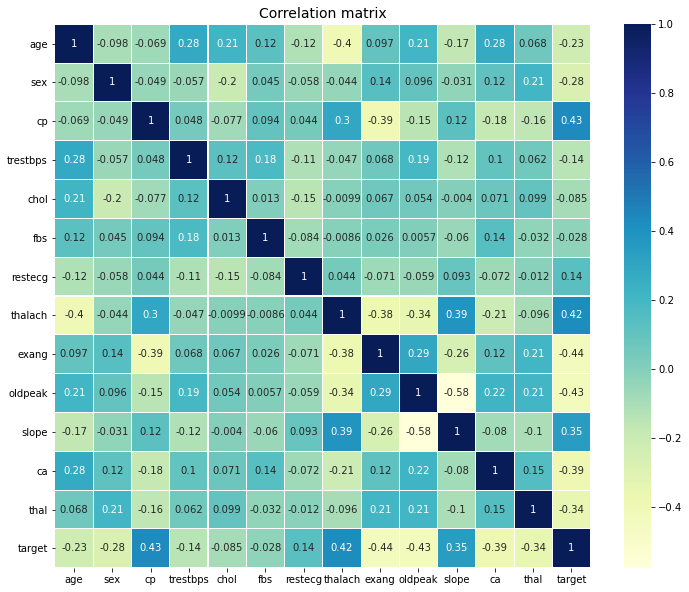

In [114]:
plt.figure(figsize = (12, 10))
ax = sns.heatmap(df.corr(), 
                 linewidth=0.01, 
                 annot = True, 
                 fmt='.2g', 
                 cmap="YlGnBu")
plt.title("Correlation matrix", fontsize=14)
plt.show()